In [19]:
from sympy import *
from sympy.simplify.fu import *
from IPython.display import Image

In [20]:
r, d = symbols('r d', nonnegative=True)
phi, x, y = symbols('varphi x y', real=True)

### Write Cartesian derivatives in polar form

In [21]:
def dx(f):
    return cos(phi) * f.diff(r) - (1/r) * sin(phi) * f.diff(phi)

def dy(f):
    return sin(phi) * f.diff(r) + (1/r) * cos(phi) * f.diff(phi)

### Isotropic far-field expansion

In [22]:
theta = -d/(2*r) * sin(phi)
display(theta)

-d*sin(varphi)/(2*r)

### Plug into rhs of eq. (21) from the paper

In [23]:
rhs = (
    sin(2*theta) * (dx(theta)**2 - dy(theta)**2 - 2 * dx(dy(theta)))
    + cos(2*theta) * (dy(dy(theta)) - dx(dx(theta)) - 2 * dx(theta) * dy(theta))
)

display(rhs)

-(d**2*sin(varphi)**2*cos(varphi)**2/r**4 + 4*d*sin(varphi)**2*cos(varphi)/r**3 - 2*(-d*sin(varphi)**2/r**3 + d*cos(varphi)**2/r**3)*cos(varphi) - (d*sin(varphi)**2/(2*r**2) - d*cos(varphi)**2/(2*r**2))**2)*sin(d*sin(varphi)/r) + (-2*d*(d*sin(varphi)**2/(2*r**2) - d*cos(varphi)**2/(2*r**2))*sin(varphi)*cos(varphi)/r**2 + 4*d*sin(varphi)*cos(varphi)**2/r**3 + (-d*sin(varphi)**2/r**3 + d*cos(varphi)**2/r**3)*sin(varphi) + (-d*sin(varphi)**2/r**2 + d*cos(varphi)**2/r**2)*sin(varphi)/r)*cos(d*sin(varphi)/r)

In [24]:
expand(rhs)

d**2*sin(varphi)**4*sin(d*sin(varphi)/r)/(4*r**4) - d**2*sin(varphi)**3*cos(varphi)*cos(d*sin(varphi)/r)/r**4 - 3*d**2*sin(varphi)**2*sin(d*sin(varphi)/r)*cos(varphi)**2/(2*r**4) + d**2*sin(varphi)*cos(varphi)**3*cos(d*sin(varphi)/r)/r**4 + d**2*sin(d*sin(varphi)/r)*cos(varphi)**4/(4*r**4) - 2*d*sin(varphi)**3*cos(d*sin(varphi)/r)/r**3 - 6*d*sin(varphi)**2*sin(d*sin(varphi)/r)*cos(varphi)/r**3 + 6*d*sin(varphi)*cos(varphi)**2*cos(d*sin(varphi)/r)/r**3 + 2*d*sin(d*sin(varphi)/r)*cos(varphi)**3/r**3

### Note that terms of the form $\sin(\sin(\phi) d/r)$ vanish at 1st order in $d/r$ while terms of the form $\cos(\sin(\phi)d/r)$ vanish at 2nd order. Hence, redo calculation without $\sin(2\theta)$ terms.

In [25]:
reduced_rhs = cos(2*theta) * (dy(dy(theta)) - dx(dx(theta)) - 2 * dx(theta) * dy(theta))

display(reduced_rhs)

(-2*d*(d*sin(varphi)**2/(2*r**2) - d*cos(varphi)**2/(2*r**2))*sin(varphi)*cos(varphi)/r**2 + 4*d*sin(varphi)*cos(varphi)**2/r**3 + (-d*sin(varphi)**2/r**3 + d*cos(varphi)**2/r**3)*sin(varphi) + (-d*sin(varphi)**2/r**2 + d*cos(varphi)**2/r**2)*sin(varphi)/r)*cos(d*sin(varphi)/r)

In [26]:
expanded_cos  = expand(reduced_rhs).subs(cos(d*sin(phi) / r), 1)
expanded_cos = expand( simplify(expanded_cos) )

display(expanded_cos)

d**2*sin(4*varphi)/(4*r**4) + 2*d*sin(3*varphi)/r**3

### Obviously the second term is $\mathcal{O}(d/r)$ and the first is $\mathcal{O}((d/r)^2)$. Hence, only the second term survives, and this is exactly what we get in eq. (27)

### As a quick check, see which terms are lowest order in $d/r$

In [27]:
dx(dx(theta))

-2*d*sin(varphi)*cos(varphi)**2/r**3 - (-d*sin(varphi)**2/r**2 + d*cos(varphi)**2/r**2)*sin(varphi)/r

In [28]:
dx(theta)*dy(theta)

d*(d*sin(varphi)**2/(2*r**2) - d*cos(varphi)**2/(2*r**2))*sin(varphi)*cos(varphi)/r**2

In [29]:
dy(dy(theta))

2*d*sin(varphi)*cos(varphi)**2/r**3 + (-d*sin(varphi)**2/r**3 + d*cos(varphi)**2/r**3)*sin(varphi)

In [30]:
simplify( dy(dy(theta)) - dx(dx(theta)) )

2*d*sin(3*varphi)/r**3

In [31]:
simplify( dy(dy(theta)) )

d*sin(3*varphi)/r**3

In [32]:
simplify(dx(dx(theta)))

-d*sin(3*varphi)/r**3

In [33]:
simplify( dx(dx(sin(3*phi) / r)) + dy(dy(sin(3*phi) / r)) )

-8*sin(3*varphi)/r**3

In [34]:
theta

-d*sin(varphi)/(2*r)

### So it really comes from $\cos(2\theta)(\theta_{yy} - \theta_{xx})$, with the rest of the terms higher order in $d/r$

## Also check $\theta_\text{iso}$ expansion

In [23]:
q1, q2 = symbols('q_1 q_2', real=True)

In [24]:
theta_iso = q1*atan2( sin(phi), cos(phi) + d/(2*r) ) + q2*atan2( sin(phi), cos(phi) - d/(2*r) )
display(theta_iso)

q_1*atan2(sin(varphi), d/(2*r) + cos(varphi)) + q_2*atan2(sin(varphi), -d/(2*r) + cos(varphi))

In [29]:
expanded_theta_iso = series(theta_iso.subs(d, x*r), x, 0, 6)
display(expanded_theta_iso)

x*(-q_1*sin(varphi)/(2*sin(varphi)**2 + 2*cos(varphi)**2) + q_2*sin(varphi)/(2*sin(varphi)**2 + 2*cos(varphi)**2)) + x**2*(q_1*sin(varphi)*cos(varphi)/(4*sin(varphi)**4 + 8*sin(varphi)**2*cos(varphi)**2 + 4*cos(varphi)**4) + q_2*sin(varphi)*cos(varphi)/(4*sin(varphi)**4 + 8*sin(varphi)**2*cos(varphi)**2 + 4*cos(varphi)**4)) + x**3*(-q_1*sin(varphi)*cos(varphi)**2/(6*sin(varphi)**6 + 18*sin(varphi)**4*cos(varphi)**2 + 18*sin(varphi)**2*cos(varphi)**4 + 6*cos(varphi)**6) + q_1*sin(varphi)/(24*sin(varphi)**4 + 48*sin(varphi)**2*cos(varphi)**2 + 24*cos(varphi)**4) + q_2*sin(varphi)*cos(varphi)**2/(6*sin(varphi)**6 + 18*sin(varphi)**4*cos(varphi)**2 + 18*sin(varphi)**2*cos(varphi)**4 + 6*cos(varphi)**6) - q_2*sin(varphi)/(24*sin(varphi)**4 + 48*sin(varphi)**2*cos(varphi)**2 + 24*cos(varphi)**4)) + x**4*(q_1*sin(varphi)*cos(varphi)**3/(8*sin(varphi)**8 + 32*sin(varphi)**6*cos(varphi)**2 + 48*sin(varphi)**4*cos(varphi)**4 + 32*sin(varphi)**2*cos(varphi)**6 + 8*cos(varphi)**8) - q_1*sin(varphi

In [30]:
concrete_expanded_theta_iso = expanded_theta_iso.subs({q1: Rational(1, 2), q2: -Rational(1, 2)})
display(concrete_expanded_theta_iso)

-x*sin(varphi)/(2*sin(varphi)**2 + 2*cos(varphi)**2) + x**3*(-sin(varphi)*cos(varphi)**2/(6*sin(varphi)**6 + 18*sin(varphi)**4*cos(varphi)**2 + 18*sin(varphi)**2*cos(varphi)**4 + 6*cos(varphi)**6) + sin(varphi)/(24*sin(varphi)**4 + 48*sin(varphi)**2*cos(varphi)**2 + 24*cos(varphi)**4)) + x**5*(-sin(varphi)*cos(varphi)**4/(10*sin(varphi)**10 + 50*sin(varphi)**8*cos(varphi)**2 + 100*sin(varphi)**6*cos(varphi)**4 + 100*sin(varphi)**4*cos(varphi)**6 + 50*sin(varphi)**2*cos(varphi)**8 + 10*cos(varphi)**10) + 3*sin(varphi)*cos(varphi)**2/(40*sin(varphi)**8 + 160*sin(varphi)**6*cos(varphi)**2 + 240*sin(varphi)**4*cos(varphi)**4 + 160*sin(varphi)**2*cos(varphi)**6 + 40*cos(varphi)**8) - sin(varphi)/(160*sin(varphi)**6 + 480*sin(varphi)**4*cos(varphi)**2 + 480*sin(varphi)**2*cos(varphi)**4 + 160*cos(varphi)**6)) + O(x**6)

# Energy

In [72]:
energy_density = -expand(dy(theta)**2 - dx(theta)**2)

display(energy_density)

-d**2*sin(varphi)**4/(4*r**4) + 3*d**2*sin(varphi)**2*cos(varphi)**2/(2*r**4) - d**2*cos(varphi)**4/(4*r**4)

In [73]:
cos_squared = TR7(cos(phi)**2)
display(cos_squared)

cos(2*varphi)/2 + 1/2

In [74]:
cos_fourth = TR7( expand(cos_squared**2) )
display(cos_fourth)

cos(2*varphi)/2 + cos(4*varphi)/8 + 3/8

In [75]:
simplified_energy = expand( expand( TR7( expand( TR5(energy_density) ) ) ).subs(cos(phi)**4, cos_fourth) )
display(simplified_energy)

-d**2*cos(4*varphi)/(4*r**4)

## Just splay portion

In [68]:
splay_perturbation = simplify( expand( dy(theta)**2 ) )
display(splay_perturbation)

d**2*(cos(4*varphi) + 1)/(8*r**4)

In [69]:
bend_perturbation = simplify( expand( -dx(theta)**2 ) )
display(bend_perturbation)

d**2*(cos(4*varphi) - 1)/(8*r**4)

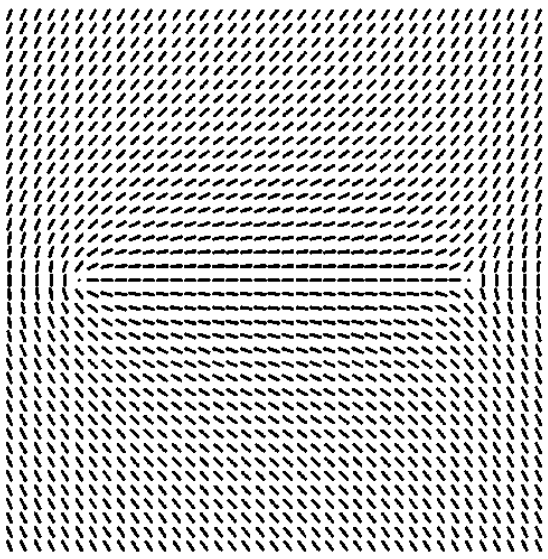

In [71]:
Image(filename='figures/isomorph_a.png') 

## Check rotational symmetry of far-field RHS

### Note that a $90^\circ$ rotation gives $y \to -x$, $x \to -y$, and $\theta \to \theta + \pi / 2$. This takes $\theta_{yy} - \theta_{xx} \to -(\theta_{yy} - \theta_{xx})$ and $\cos(2\theta) \to -\cos(2\theta)$. Hence, the RHS is unchanged.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

(-5.005005005005005, 5.005005005005005, -5.005005005005005, 5.005005005005005)

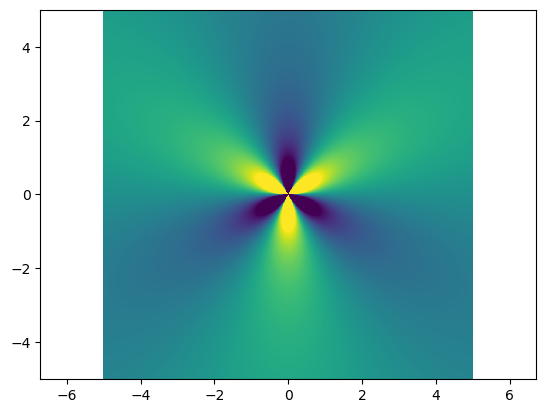

In [14]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y, indexing='ij')
Phi = np.arctan2(Y, X)
R = np.sqrt(X**2 + Y**2)

plt.pcolormesh(X, Y, (1 / R) * np.sin(3*Phi), vmax=1, vmin=-1)
plt.axis('equal')

(-5.005005005005005, 5.005005005005005, -5.005005005005005, 5.005005005005005)

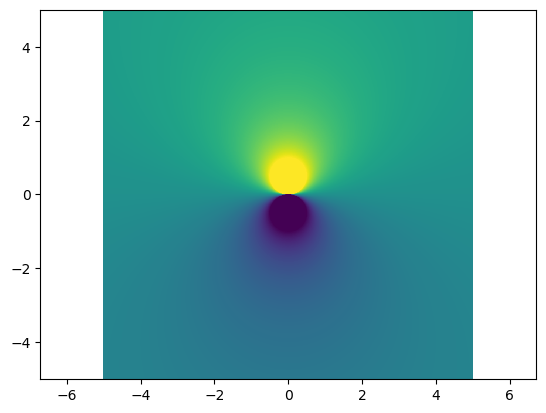

In [15]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y, indexing='ij')
Phi = np.arctan2(Y, X)
R = np.sqrt(X**2 + Y**2)

plt.pcolormesh(X, Y, (1 / R) * np.sin(Phi), vmax=1, vmin=-1)
plt.axis('equal')

(-5.005005005005005, 5.005005005005005, -5.005005005005005, 5.005005005005005)

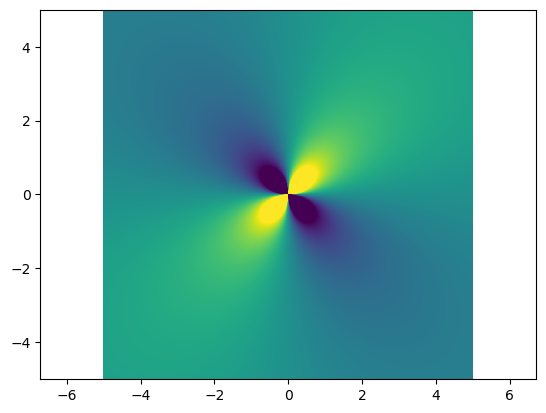

In [16]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y, indexing='ij')
Phi = np.arctan2(Y, X)
R = np.sqrt(X**2 + Y**2)

plt.pcolormesh(X, Y, (1 / R) * np.sin(2*Phi), vmax=1, vmin=-1)
plt.axis('equal')